# Spark RDD

# S.2 SparkSession

## 2.1 경로추가

In [3]:
import os
import sys

#full-version
os.environ["SPARK_HOME"]="C:\\spark\\spark-3.1.2-bin-hadoop3.2"
os.environ["PYLIB"]="C:\\spark\\spark-3.1.2-bin-hadoop3.2\\python\\lib"
# os.environ["PYSPARK_PYTHON"]="C:\\Users\\SW\\anaconda3\\python.exe"
# os.environ["PYSPARK_DRIVER_PYTHON"]="C:\\Users\\SW\\anaconda3\\python.exe"
# os.environ["JAVA_HOME"]="C:\\Program Files\\Java\\jdk-11.0.11\\bin"

sys.path.insert(0,os.path.join(os.environ["PYLIB"],"py4j-0.10.9-src.zip"))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],"pyspark.zip"))

## 2.2 세션생성

In [1]:
import findspark
findspark.init()

import pyspark
myConf = pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("ds3_")\
    .config(conf=myConf)\
    .getOrCreate()
print(spark.version)

3.1.2


# S.3 데이터구조

* RDD
* DataFrame
* Dataset

모두 immutable(생성 후 원본 수정 불가)

# S.5 RDD 생성

## 1. List에서 RDD

In [3]:
myList=[1,2,3,4,5,6,7]
# RDD 생성
myRdd1 = spark.sparkContext.parallelize(myList)
# RDD 실행
print(myRdd1.take(3))
spark.sparkContext.parallelize([0, 2, 3, 4, 6], 2).collect()

[1, 2, 3]


[0, 2, 3, 4, 6]

- glom() : 각 partition에 있는 요소를 묶어서 RDD 만들어 준다.

In [4]:
spark.sparkContext.parallelize([0, 2, 3, 4, 6], 2).glom().collect()

[[0, 2], [3, 4, 6]]

## 2. 파일에서 RDD 생성하기

data/ds_spark_wiki.txt
```
Wikipedia
Apache Spark is an open source cluster computing framework.
아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.
...
```

In [6]:
import os
myRdd2 = spark.sparkContext\
    .textFile(os.path.join('data','ds_spark_wiki.txt'))

#first()함수는 첫 번째 데이터 조회
myRdd2.first()

'Wikipedia'

## 3. csv에서 RDD 생성하기
./data/ds_spark_2cols.csv

In [7]:
myRdd4 = spark.sparkContext\
    .textFile(os.path.join('data','ds_spark_2cols.csv'))

myList=myRdd4.take(5)
print(type(myList))

<class 'list'>


# 문제: 파일에서 RDD 생성
1) 경기도 의정부시 인구현황 (파일명: 경기도 의정부시_인구현황_20210910.csv) https://www.data.go.kr/data/15009613/fileData.do

2) 제주특별자치도 서귀포시 내 연도별 65세이상 인구수 및 고령화비율, 노령화지수 현황 (파일명: 제주특별자치도 서귀포시_고령화비율및노령화지수현황_20210831.csv) https://www.data.go.kr/data/15051545/fileData.do

## 1. RDD로 읽기

In [8]:
popRdd =spark.sparkContext\
    .textFile(os.path.join('data','경기도 의정부시_인구현황_20210910.csv'))
agedRdd = spark.sparkContext\
    .textFile(os.path.join("data","제주특별자치도 서귀포시_고령화비율및노령화지수현황_20210831.csv"), use_unicode=True)

print(popRdd.take(5),'\n')

for i in agedRdd.take(5):
    print(i)

['�������,�α���(��),�α���(��),�α���(��),������(��),������(��),������(��),����,�����,������α�,���������,�����μ���,�μ���ȭ��ȣ,�����ͱ�������', '������1��,32292,16538,15754,6.97,3.57,3.4,104.98,19998,1.61,�����ν�,�ο����ǰ�,031-828-2466,2021-09-10', '������2��,31380,15608,15772,6.77,3.37,3.4,98.96,16410,1.91,�����ν�,�ο����ǰ�,031-828-2466,2021-09-10', 'ȣ��1��,36124,17595,18529,7.8,3.8,4,94.96,15653,2.31,�����ν�,�ο����ǰ�,031-828-2466,2021-09-10', 'ȣ��2��,34957,16923,18034,7.54,3.65,3.89,93.84,13683,2.55,�����ν�,�ο����ǰ�,031-828-2466,2021-09-10'] 

������,�������� �α���,65���̻� �α��� ,14������ �α���,���ȭ����,���ȭ����,�����ͱ�������
2012,154057,25826,22861,16.76,112.97,2021-08-31
2013,155641,26936,22393,17.31,120.29,2021-08-31
2014,158512,27877,22058,17.59,126.38,2021-08-31
2015,164519,28979,22362,17.61,129.59,2021-08-31


## 2. binaryFiles
이진 파일을 읽는 함수, 이진 파일로 읽어 한글을 출력한다.

In [9]:
popRddBin = spark.sparkContext.binaryFiles(os.path.join('data','경기도 의정부시_인구현황_20210910.csv'))
_my = popRddBin.map(lambda x : x[1].decode('euc-kr'))
_my.take(1)

['행정기관,인구수(계),인구수(남),인구수(여),구성비(계),구성비(남),구성비(여),성비,세대수,세대당인구,관리기관명,관리부서명,부서전화번호,데이터기준일자\r\n의정부1동,32292,16538,15754,6.97,3.57,3.4,104.98,19998,1.61,의정부시,민원여권과,031-828-2466,2021-09-10\r\n의정부2동,31380,15608,15772,6.77,3.37,3.4,98.96,16410,1.91,의정부시,민원여권과,031-828-2466,2021-09-10\r\n호원1동,36124,17595,18529,7.8,3.8,4,94.96,15653,2.31,의정부시,민원여권과,031-828-2466,2021-09-10\r\n호원2동,34957,16923,18034,7.54,3.65,3.89,93.84,13683,2.55,의정부시,민원여권과,031-828-2466,2021-09-10\r\n장암동,20314,9714,10600,4.38,2.1,2.29,91.64,8604,2.36,의정부시,민원여권과,031-828-2466,2021-09-10\r\n신곡1동,43159,21205,21954,9.31,4.58,4.74,96.59,17990,2.4,의정부시,민원여권과,031-828-2466,2021-09-10\r\n신곡2동,47852,23232,24620,10.33,5.01,5.31,94.36,19218,2.49,의정부시,민원여권과,031-828-2466,2021-09-10\r\n송산1동,42817,21276,21541,9.24,4.59,4.65,98.77,18811,2.28,의정부시,민원여권과,031-828-2466,2021-09-10\r\n송산2동,33565,16601,16964,7.24,3.58,3.66,97.86,13216,2.54,의정부시,민원여권과,031-828-2466,2021-09-10\r\n송산3동,46892,22772,24120,10.12,4.91,5.21,94.41,17926,2.62,의정부시,민원여권과,031-828-2466

# 3. spark-submit 실행
py파일로 저장하고 spark-submit 명령으로 실행가능

src/ds3_popCsvRead.py

In [25]:
%%writefile src/ds3_popCsvRead.py
#python3
#coding: UTF-8
import findspark
findspark.init()

import os
import pyspark

def doIt():
    print("-----RESULT------")
    popDf = spark\
        .read.option("charset","euc-kr")\
        .option("header", "true")\
        .csv(os.path.join("data","경기도 의정부시_인구현황_20210910.csv"))
    popDf.show(5)
    agedDf = spark\
        .read.option("charset","euc-kr")\
        .option("header", "true")\
        .csv(os.path.join("data","제주특별자치도 서귀포시_고령화비율및노령화지수현황_20210831.csv"))
    agedDf.show(5)
            
if __name__ == "__main__":
    os.environ["PYSPARK_PYTHON"]="C:\\Users\\SW\\anaconda3\\python.exe"
    os.environ["PYSPARK_DRIVER_PYTHON"]="C:\\Users\\SW\\anaconda3\\python.exe"
    myConf=pyspark.SparkConf()
    spark=pyspark.sql.SparkSession\
        .builder\
        .master("local")\
        .appName("myApp")\
        .config(conf=myConf)\
        .getOrCreate()
    doIt()
    spark.stop()

Overwriting src/ds3_popCsvRead.py


In [2]:
#경로 모음 실행하면 경로를 못찾는 오류
!spark-submit src/ds3_popCsvRead.py

-----RESULT------
+---------+----------+----------+----------+----------+----------+----------+------+------+----------+----------+----------+------------+--------------+
| 행정기관|인구수(계)|인구수(남)|인구수(여)|구성비(계)|구성비(남)|구성비(여)|  성비|세대수|세대당인구|관리기관명|관리부서명|부서전화번호|데이터기준일자|
+---------+----------+----------+----------+----------+----------+----------+------+------+----------+----------+----------+------------+--------------+
|의정부1동|     32292|     16538|     15754|      6.97|      3.57|       3.4|104.98| 19998|      1.61|  의정부시|민원여권과|031-828-2466|    2021-09-10|
|의정부2동|     31380|     15608|     15772|      6.77|      3.37|       3.4| 98.96| 16410|      1.91|  의정부시|민원여권과|031-828-2466|    2021-09-10|
|  호원1동|     36124|     17595|     18529|       7.8|       3.8|         4| 94.96| 15653|      2.31|  의정부시|민원여권과|031-828-2466|    2021-09-10|
|  호원2동|     34957|     16923|     18034|      7.54|      3.65|      3.89| 93.84| 13683|      2.55|  의정부시|민원여권과|031-828-2466|    2021-09-10|
|   장암동|     20314|   

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
21/10/22 10:25:10 INFO SparkContext: Running Spark version 3.1.2
21/10/22 10:25:10 INFO ResourceUtils: ==============================================================
21/10/22 10:25:10 INFO ResourceUtils: No custom resources configured for spark.driver.
21/10/22 10:25:10 INFO ResourceUtils: ==============================================================
21/10/22 10:25:10 INFO SparkContext: Submitted application: myApp
21/10/22 10:25:10 INFO ResourceProfile: Default ResourceProfile created, executor resources: Map(cores -> name: cores, amount: 1, script: , vendor: , memory -> name: memory, amount: 1024, script: , vendor: , offHeap -> name: offHeap, amount: 0, script: , vendor: ), task resources: Map(cpus -> name: cpus, amount: 1.0)
21/10/22 10:25:10 INFO ResourceProfile: Limiting resource is cpu
21/10/22 10:25:10 INFO ResourceProfileManager: Added ResourceProfile id: 0
21/10/22 10:25:10 INFO SecurityManager: C

# S.6 RDD API
변환 tramsformation
```
함수	설명	예제
map(fn)	요소별로 fn을 적용해서 결과 RDD 돌려줌	.map(lambda x: x.split(' ')
filter(fn)	요소별로 선별하여 fn을 적용해서 결과 RDD 돌려줌	.filter(lambda x: "Spark" in x)
flatMap(fn)	요소별로 fn을 적용하고, flat해서 결과 RDD 돌려줌	.flatMap(lambda x: x.split(' '))
groupByKey()	key를 그룹해서 iterator를 돌려줌.	
```
action
```
함수	설명	예제
reduce(fn)	요소별로 fn을 사용해서 줄여서 결과 list를 돌려줌	reduce(lambda x,y:x+y)
collect()	모든 요소를 결과 list로 돌려줌	
count()	요소의 갯수를 결과 list로 돌려줌	
take(n)	collect()는 전체이지만, n개만 돌려줌	take(1)
countByKey()	key별 갯수를 세는 함수	countByKey().items()
foreach(fn)	각 데이터 항목에 함수fn을 적용	
```

## 1. Python함수로 먼저 해보기

In [10]:
celsius = [39.2, 36.5, 37.3, 37.8]
def c2f(c):
    f=list()
    for i in c:
        _f=(float(9)/5)*i + 32
        f.append(_f)
    return f

print (c2f(celsius))

[102.56, 97.7, 99.14, 100.03999999999999]


## 2. RDD 사용하기

### (1) map

In [15]:
nRdd = spark.sparkContext.parallelize([1,2,3,4])
squard = nRdd.map(lambda x: x*x)
print(squard)
print(squard.collect(),'\n')

myRdd5 = myRdd4.map(lambda line: line.split(','))
print(myRdd5.take(5),'\n')

myRdd6 = myRdd5.map(lambda x: [int(i) for i in x])
myRdd6.take(5)

PythonRDD[29] at RDD at PythonRDD.scala:53
[1, 4, 9, 16] 

[['35', ' 2'], ['40', ' 27'], ['12', ' 38'], ['15', ' 31'], ['21', ' 1']] 



[[35, 2], [40, 27], [12, 38], [15, 31], [21, 1]]

In [17]:
# 단어 분리, 단어 세기, ds_spark_wiki.txt 이용
sentences = myRdd2.map(lambda x:x.split())
print(sentences.count())
print(myRdd2.map(lambda s:len(s)).collect())

#교체
myList=['this is','a line']
_rdd=spark.sparkContext.parallelize(myList)
wordRdd = _rdd.map(lambda x : x.split())
repRdd = _rdd.map(lambda x:x.replace('a','AA'))
print(repRdd.take(3))

#대소문자 변환
upperRdd = wordRdd.map(lambda x: x[0].upper())
print(upperRdd.collect())

upper2Rdd=wordRdd.map(lambda x: [i.upper() for i in x])
print(upper2Rdd.collect())

10
[9, 59, 32, 51, 31, 72, 71, 30, 64, 46]
['this is', 'AA line']
['THIS', 'A']
[['THIS', 'IS'], ['A', 'LINE']]


### (2) reduce
반복문 없이 반복

In [20]:
myRdd100 = spark.sparkContext.parallelize(range(1,101))
print(myRdd100.reduce(lambda sub, x : sub+x))

5050


단순 통계 기능

In [21]:
# 단순 통계 기능
print('sum:',myRdd100.sum())
print('min:',myRdd100.min())
print('max:',myRdd100.max())
print('standard deviation:',myRdd100.stdev())
print('variable:',myRdd100.variance())

sum: 5050
min: 1
max: 100
standard deviation: 28.86607004772212
variable: 833.25


### (3) filter

In [22]:
myRdd_spark=myRdd2.filter(lambda line: 'Spark' in line)
print('Spark 단어 수 :',myRdd_spark.count(),'\n')

#한글
myRdd_unicode=myRdd2.filter(lambda line: u'스파크' in line)
print(myRdd_unicode.first(),'\n')

#불용어 제거
stopwords = ['is','am','are','the','for','a','an','at']
myRdd_stop=myRdd2.flatMap(lambda x: x.split())\
                .filter(lambda x : x not in stopwords)
for words in myRdd_stop.collect():
    print(words, end=' ')

Spark 단어 수 : 4 

아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다. 

Wikipedia Apache Spark open source cluster computing framework. 아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다. Apache Spark Apache Spark Apache Spark Apache Spark 아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크 Originally developed University of California, Berkeley's AMPLab, Spark codebase was later donated to Apache Software Foundation, which has maintained it since. Spark provides interface programming entire clusters with implicit data parallelism and fault-tolerance. 

### (4) foreach
반환값이 없는 action함수

In [23]:
spark.sparkContext.parallelize([1, 2, 3, 4, 5]).foreach(lambda x: x + 1)

In [24]:
#커널에서 실행할 때 f함수를 이용해 출력
def f(x): print(x)
spark.sparkContext.parallelize([1, 2, 3, 4, 5]).foreach(f)

### (5) pipeline 
함수를 하나씩 실행하지 않고 연이어 한번에 실행 -> 효율 업

In [25]:
wordsLength = wordRdd\
    .map(len)\
    .collect()
print(wordsLength)

[2, 2]


### (6) 파일에 쓰기

In [33]:
upper2list=wordRdd.map(lambda x: [i.upper() for i in x]).collect()
print (type(upper2list))

spark.sparkContext.parallelize(upper2list).saveAsTextFile("data/ds_spark_wiki_out_s")

<class 'list'>


In [36]:
!dir data\ds_spark_wiki_out_s

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: C826-817A

 C:\Users\SW\Code\yhm\data\ds_spark_wiki_out_s 디렉터리

2021-10-22  오후 12:32    <DIR>          .
2021-10-22  오후 12:32    <DIR>          ..
2021-10-22  오후 12:32                12 .part-00000.crc
2021-10-22  오후 12:32                 8 ._SUCCESS.crc
2021-10-22  오후 12:32                29 part-00000
2021-10-22  오후 12:32                 0 _SUCCESS
               4개 파일                  49 바이트
               2개 디렉터리  378,133,835,776 바이트 남음


In [38]:
_rdd=spark.sparkContext.textFile('data/ds_spark_wiki_out_s')
_rdd.collect()

["['THIS', 'IS']", "['A', 'LINE']"]

In [39]:
# 파일로 쓰기 coalesce함수
#_rdd.map(lambda x:"".join(x)).coalesce(1).saveAsTextFile("data/ds_spark_wiki_txt")
!type data\ds_spark_wiki_txt\part-00000

['THIS']
['IS']
['A', 'LINE']


### (7) group By
transformation 함수
키- 밸류로 데이터가 쌍을 이룸

In [40]:
myRdd_group=myRdd2.groupBy(lambda x:x[0:2])

for (k,v) in myRdd_group.collect():
    print("{}:{}".format(k,v))
print('\n')

#ResultIterable을 해체
for (k,v) in myRdd_group.collect():
    for eachValue in v:
        print("{}: {}".format(k, eachValue))
    print("-----")

Wi:<pyspark.resultiterable.ResultIterable object at 0x0000020D05736DC0>
Ap:<pyspark.resultiterable.ResultIterable object at 0x0000020D05742D60>
아파:<pyspark.resultiterable.ResultIterable object at 0x0000020D05742A90>
Or:<pyspark.resultiterable.ResultIterable object at 0x0000020D057429D0>
th:<pyspark.resultiterable.ResultIterable object at 0x0000020D05742880>
wh:<pyspark.resultiterable.ResultIterable object at 0x0000020D057422B0>
Sp:<pyspark.resultiterable.ResultIterable object at 0x0000020D057421F0>
im:<pyspark.resultiterable.ResultIterable object at 0x0000020D05742160>


Wi: Wikipedia
-----
Ap: Apache Spark is an open source cluster computing framework.
Ap: Apache Spark Apache Spark Apache Spark Apache Spark
-----
아파: 아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.
아파: 아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크
-----
Or: Originally developed at the University of California, Berkeley's AMPLab,
-----
th: the Spark codebase was later donated to the Apache Software Foundation,
-----
wh: which has maintained it sinc

In [41]:
_testList=[("Seoul",1),("Seoul",1),("Seoul",1),("Busan",1),("Busan",1),
           ("Seoul",1),("Busan",1),
           ("Seoul",1),("Seoul",1),("Busan",1),("Busan",1)]
_testRdd=spark.sparkContext.parallelize(_testList)

#ResultIterable을 리스트로 변환하여 값을 볼 때 mapValues() 함수를 사용.
_testRdd.groupBy(lambda x:x[0]).collect()
_testRdd.groupBy(lambda x:x[0]).mapValues(lambda x: list(x)).collect()
#mapValues(list)라고 써도 됨

[('Seoul',
  [('Seoul', 1),
   ('Seoul', 1),
   ('Seoul', 1),
   ('Seoul', 1),
   ('Seoul', 1),
   ('Seoul', 1)]),
 ('Busan',
  [('Busan', 1), ('Busan', 1), ('Busan', 1), ('Busan', 1), ('Busan', 1)])]

## 3. Pair RDD
key-value쌍으로 되어 있는 데이터
```
구분	설명
groupByKey()	같은 key를 grouping, partition에서 먼저 reduce하지 않고, 전체로 계산한다.
reduceByKey()	같은 key의 value를 합계, partition에서 먼저 reduce하고, 전체로 계산한다. grouping + aggregation.
즉 reduceByKey = groupByKey().reduce()

combineByKey()	키별로 합계, 개수 (key, (sum, count))를 계산. createCombiner, mergeValue, mergeCombiners.
aggregateByKey()	reduceByKey()와 유사한 기능을 수행한다. 키별로 합계, 개수, 평균을 계산.
mapValues()	Paired RDD는 key,value가 있기 마련이고, value에 적용하는 함수이다.
```

### (1) 파티션 수

In [45]:
_testList=[("key1",1),("key1",1),("key1",1),("key2",1),("key2",1),
           ("key1",1),("key2",1),
           ("key1",1),("key1",1),("key2",1),("key2",1)]
_testRdd=spark.sparkContext.parallelize(_testList)

#파티션수 : 클러스터 노드에 배분된 데이터 수 확인
print(_testRdd.getNumPartitions())
#파티션수 바꾸기
_testRdd=spark.sparkContext.parallelize(_testList,2)
print(_testRdd.getNumPartitions())

1
2


### (2) groupByKey, reduceByKey, mapValues

groupBy 결과는 ResultIterable 따라서 mapValues를 사용해여 값을 볼 수 있다.

reduceByKey는 groupByKey()와 달리 키별로 빈도를 합산하기 때문에 mapValues()가 필요없다.<br>
reduce()는 함수를 사용해서 인자를 2개 받아서 1개로 병합하는 기능을 수행한다.

In [48]:
print(_testRdd.groupByKey().mapValues(list).collect())
print(_testRdd.reduceByKey(lambda x,y:x+y).collect())
print(_testRdd.mapValues(lambda x:x+1).collect())

[('key1', [1, 1, 1, 1, 1, 1]), ('key2', [1, 1, 1, 1, 1])]
[('key1', 6), ('key2', 5)]
[('key1', 2), ('key1', 2), ('key1', 2), ('key2', 2), ('key2', 2), ('key1', 2), ('key2', 2), ('key1', 2), ('key1', 2), ('key2', 2), ('key2', 2)]


- 단어 빈도 예제
```
1    flatMap()은 RDD를 전체로 flatten해서 공백으로 분리하고, 단어빈도를 계산한다. map()은 요소별로 적용된다.
2    요소에 대해 단어빈도 (x,1)를 만듦
3    groupByKey()는 key를 묶어준다. 따라서 ResultIterable iterator를 반환한다.
```

In [51]:
# groupByKey
wc = myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x: (x,1))\
    .groupByKey()\
    .mapValues(sum)\
    .sortByKey(True)

for e in wc.take(5):
    print(f"단어:{e[0]}, 빈도: {e[1]}")

단어:AMPLab,, 빈도: 1
단어:Apache, 빈도: 6
단어:Berkeley's, 빈도: 1
단어:California,, 빈도: 1
단어:Foundation,, 빈도: 1


In [52]:
# reduceByKey
myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x: (x,1))\
    .reduceByKey(lambda x,y: x+y)\
    .take(5)

[('Wikipedia', 1), ('Apache', 6), ('Spark', 7), ('is', 1), ('an', 2)]

### (3) countByKey
key 별로 계산하는 action함수, dict형식으로 결과가 반환됨

list반환이 필요한 경우 countByKey().items()하면 리스크로 변환 가능

In [53]:
myRdd2\
    .flatMap(lambda x :x.split())\
    .map(lambda x: (x,1))\
    .countByKey()

defaultdict(int,
            {'Wikipedia': 1,
             'Apache': 6,
             'Spark': 7,
             'is': 1,
             'an': 2,
             'open': 1,
             'source': 1,
             'cluster': 1,
             'computing': 1,
             'framework.': 1,
             '아파치': 5,
             '스파크는': 1,
             '오픈': 1,
             '소스': 1,
             '클러스터': 1,
             '컴퓨팅': 1,
             '프레임워크이다.': 1,
             '스파크': 4,
             'Originally': 1,
             'developed': 1,
             'at': 1,
             'the': 3,
             'University': 1,
             'of': 1,
             'California,': 1,
             "Berkeley's": 1,
             'AMPLab,': 1,
             'codebase': 1,
             'was': 1,
             'later': 1,
             'donated': 1,
             'to': 1,
             'Software': 1,
             'Foundation,': 1,
             'which': 1,
             'has': 1,
             'maintained': 1,
             'it': 1,
      

# 문제 S-2 : RDD를 사용하여 단어빈도를 계산하고, 그래프 그리기.
텍스트 파일을 읽어서, 단어빈도를 계산하는 프로그램을 작성하세요. 단어빈도를 내림차순으로 출력해서 상위 15개를 출력하세요.

data/ds_bigdata_wiki.txt

In [54]:
myRdd3=spark.sparkContext.textFile(os.path.join('data','ds_bigdata_wiki.txt'))
for i in myRdd3.take(5):
    print(i)

Big data
활용사례 및 의의[편집]
정치 및 사회[편집]
2008년 미국 대통령 선거[편집]
2008년 미국 대통령 선거에서 버락 오바마 미국 대통령 후보는 다양한 형태의 유권자 데이터베이스를 확보하여 이를 분석, 활용한 '유권자 맞춤형 선거 전략'을 전개했다. 당시 오바마 캠프는 인종, 종교, 나이, 가구형태, 소비수준과 같은 기본 인적 사항으로 유권자를 분류하는 것을 넘어서서 과거 투표 여부, 구독하는 잡지, 마시는 음료 등 유권자 성향까지 전화나 개별 방문을 또는 소셜 미디어를 통해 유권자 정보를 수집하였다. 수집된 데이터는 오바마 캠프 본부로 전송되어 유권자 데이터베이스를 온라인으로 통합관리하는 ‘보트빌더(VoteBuilder.com)’시스템의 도움으로 유권자 성향 분석, 미결정 유권자 선별 , 유권자에 대한 예측을 해나갔다. 이를 바탕으로‘유권자 지도’를 작성한 뒤 ‘유권자 맞춤형 선거 전략’을 전개하는 등 오바마 캠프는 비용 대비 효과적인 선거를 치를 수 있었다.


In [56]:
wc3 = myRdd3.map(lambda x : x.split())
for i in wc3.take(3):
    for j in i:
        print(j, end='/')

Big/data/활용사례/및/의의[편집]/정치/및/사회[편집]/

불용어 제거

In [57]:
stopwords = set(['및','이를','등','이','이런','그와','또는','두', '이와', '전', '간'])

wc3=myRdd3\
    .flatMap(lambda x:x.split())\
    .filter(lambda x: x.lower() not in stopwords)\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\
    .map(lambda x:(x[1],x[0]))\
    .sortByKey(False)\
    .take(15)

print (type(wc3))
for i in wc3:
    print (i[0],i[1])

<class 'list'>
21 데이터
18 데이터를
14 빅
9 있다.
8 수
8 데이터의
7 미국
7 통해
6 유권자
6 선거
6 대한
6 빅데이터
5 활용한
5 소셜
5 대한민국


막대그래프

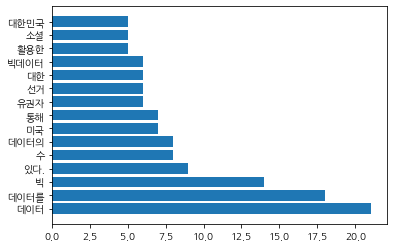

In [59]:
k=list()
v=list()
for i in wc3:
    k.append(i[1])
    v.append(i[0])

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.barh(range(len(v)), v)
plt.yticks(range(len(v)),k)
plt.show()

# 문제 S-3: 성적 합계 및 평균.
아래 데이터를 RDD로 만들고, 성적의 합계 및 평균을 계산하세요. 하위 문제별로 RDD를 생성하지 말고, 원본데이터에서 하나의 RDD만을 생성하고, 이를 변형해서 문제를 푸세요.
```
이름	과목	점수
김하나	English	100
김하나	Math	80
임하나	English	70
임하나	Math	100
김갑돌	English	82.3
김갑돌	Math	98.5
```

문제 3-1: 이름으로 합계를 구해보자. 올바른 출력은 다음과 같다. 이름과 점수로 데이터를 추출하고, 이름별로 (이름을 키로) 합계를 계산한다.
```
'임하나' 170.0
'김하나' 180.0
'김갑돌' 180.8
```
문제 3-2: 과목으로 합계를 계산해 보자. 출력은 다음과 같이 나와야 한다. 과목과 점수로 데이터를 추출하여, 과목별로 (과목을 키로) 합계를 계산한다.
```
'English' 252.3
'Math' 278.5
```
문제 3-3: 이름으로 합계과 개수를 구해보자. 출력은 다음과 같이 계산된다. 이름과 점수로 데이터를 추출하여, 이름별로 (이름을 키로) 합계와 개수를 계산한다.
```
'임하나' (170.0, 2)
'김하나' (180.0, 2)
'김갑돌' (180.8, 2)
```
문제 3-4: 이름으로 평균을 계산해 보자. 앞서 3-3에서 사용했던 결과를 활용하고, 올바른 출력은 다음과 같다.
```
'임하나' 85.0
'김하나' 90.0
'김갑돌' 90.4
```

In [89]:
marks=marks = ["김하나, English, 100",
         "김하나, Math, 80",
         "임하나, English, 70",
         "임하나, Math, 100",
         "김갑돌, English, 82.3",
         "김갑돌, Math, 98.5"
        ]

marksRdd=spark.sparkContext.parallelize(marks)

#문제 1
marksSum = marksRdd.map(lambda x : x.split(','))\
                .map(lambda x: (x[0],(float)(x[2])))\
                .reduceByKey(lambda x,y:x+y)\
                .sortByKey(False).collect()
for i in marksSum:
    print(f"'{i[0]}' {i[1]}")
print('\n')
# 문제 2
marksSum2 = marksRdd.map(lambda x : x.split(','))\
                .map(lambda x: (x[1],(float)(x[2])))\
                .reduceByKey(lambda x,y:x+y)\
                .sortByKey(True).collect()
for i in marksSum2:
    print(f"'{i[0]}' {i[1]}")
print('\n')

#평균
marksAvg = marksRdd.map(lambda x: x.split(','))\
            .map(lambda x: (x[0],(float)(x[2])))\
            .combineByKey(lambda value: (value,1),
                        lambda x,value: (x[0]+value, x[1]+1),
                        lambda x,y: (x[0]+y[0], x[1]+y[1]))\
            .map(lambda x: (x[0],x[1][0]/x[1][1]))\
            .sortByKey(True).collect()

for i in marksAvg:
    print(f"'{i[0]}' {i[1]}")

'임하나' 170.0
'김하나' 180.0
'김갑돌' 180.8


' English' 252.3
' Math' 278.5


'김갑돌' 90.4
'김하나' 90.0
'임하나' 85.0


# 문제 S-4: 서울시 지하철호선별 승차인원 평균 구하기.

문제 : 정량데이터는 보통 집단화하여 빈도, 평균, 합계 등 서술통계를 계산한다. 서울시 지하철호선별 역별 승하차 인원 정보를 가져와 평균을 구해보자.

* 파일 명 CARD_SUBWAY_MONTH_202105.csv를 다운로드 받아서 일부만 테스트용 데이터로 사용한다.
* 오픈API 샘플URL http://openapi.seoul.go.kr:8088/(인증키)/xml/CardSubwayStatsNew/1/5/20151101
* 답 [('2호선', 10529.0), ('3호선', 9236.0), ('4호선', 5704.0), ('경부선', 19989.6), ('경원선', 1194.75)]
```
변수명	타입	변수설명	값설명
KEY	String(필수)	인증키	OpenAPI 에서 발급된 인증키
TYPE	String(필수)	요청파일타입	xml : xml, xml파일 : xmlf, 엑셀파일 : xls, json파일 : json
SERVICE	String(필수)	서비스명	CardSubwayStatsNew
START_INDEX	INTEGER(필수)	요청시작위치	정수 입력 (페이징 시작번호 입니다 : 데이터 행 시작번호)
END_INDEX	INTEGER(필수)	요청종료위치	정수 입력 (페이징 끝번호 입니다 : 데이터 행 끝번호)
USE_DT	STRING(필수)	사용일자	YYYYMMDD 형식의 문자열
```

In [156]:
import os
import src.mylib
import requests

#인증키 생성
keyPath = os.path.join(os.getcwd(), 'src', 'key.properties')
key = src.mylib.getKey(keyPath)
KEY = str(key['dataseoul'])

#인자
TYPE='json'
SERVICE='CardSubwayStatsNew'
START_INDEX=str(1)
END_INDEX=str(20)
USE_DT='20151101'

#url
_url ='http://openapi.seoul.go.kr:8088'
url = '/'.join([_url, KEY, TYPE, SERVICE, START_INDEX, END_INDEX, USE_DT])
print(url)

r=requests.get(url)
sub=r.json()
# print(sub['CardSubwayStatsNew']['row'])
_sub = sub['CardSubwayStatsNew']['row']
_s=[]
for i in _sub:
    u=str(i['USE_DT'])
    l=i['LINE_NUM']
    s=i['SUB_STA_NM']
    r=str(i['RIDE_PASGR_NUM'])
    a=str(i["ALIGHT_PASGR_NUM"])
    w=str(i['WORK_DT'])
    _sum = u+','+l+','+s+','+r+','+a+','+w
    _s.append(_sum)
#"사용일자","노선명","역ID","역명",승차총승객수,하차총승객수
#print(_s)
_subRdd = spark.sparkContext.parallelize(_s)
print(_subRdd.collect())

http://openapi.seoul.go.kr:8088/62436e77746b69743237566f4f6f6f/json/CardSubwayStatsNew/1/20/20151101
['20151101,1호선,서울역,53097.0,45172.0,20151203', '20151101,1호선,시청,16963.0,16793.0,20151203', '20151101,1호선,종각,25924.0,20608.0,20151203', '20151101,1호선,종로3가,23769.0,19962.0,20151203', '20151101,1호선,종로5가,12945.0,13012.0,20151203', '20151101,1호선,동대문,14825.0,18294.0,20151203', '20151101,1호선,신설동,10187.0,9620.0,20151203', '20151101,1호선,제기동,12830.0,13067.0,20151203', '20151101,1호선,청량리(지하),24023.0,24379.0,20151203', '20151101,1호선,동묘앞,13289.0,13593.0,20151203', '20151101,2호선,시청,12201.0,11375.0,20151203', '20151101,2호선,을지로입구,33374.0,30589.0,20151203', '20151101,2호선,을지로3가,9327.0,8584.0,20151203', '20151101,2호선,을지로4가,4664.0,4554.0,20151203', '20151101,2호선,동대문역사문화공원,13824.0,16949.0,20151203', '20151101,2호선,신당,10588.0,11497.0,20151203', '20151101,2호선,상왕십리,6273.0,6173.0,20151203', '20151101,2호선,왕십리(성동구청),14060.0,12865.0,20151203', '20151101,2호선,한양대,4617.0,5630.0,20151203', '20151101,2호선,뚝섬,9362.0,9446.0,

In [157]:
_subAvg = _subRdd\
            .map(lambda x : x.split(','))\
            .map(lambda x :(x[1],(float)(x[3])))\
            .combineByKey(
                (lambda x: (x, 1)), 
                (lambda acc, value: (acc[0]+value, acc[1]+1)),
                (lambda acc1, acc2: (acc1[0]+acc2[0], acc1[1]+acc2[1]))
            )\
            .map(lambda x: (x[0],x[1][0]/x[1][1]))
_subAvg.collect() #왜?

[('1호선', 20785.2), ('2호선', 11829.0)]

In [150]:
#일부를 가져와서 사용한다.
_sub=["20150101,2호선,0236,영등포구청,6199,6219",
"20150101,2호선,0237,당산,7982,8946",
"20150101,2호선,0238,합정,17406,15241",
"20150101,3호선,0309,지축,515,538",
"20150101,3호선,0310,구파발,6879,6260",
"20150101,3호선,0311,연신내,20031,19470",
"20150101,3호선,0312,불광,9519,11029",
"20150101,4호선,0425,회현,7465,7574",
"20150101,4호선,0426,서울역,3943,10823",
"20150101,경부선,1002,남영,4340,4535",
"20150101,경부선,1003,용산,28980,27684",
"20150101,경부선,1004,노량진,23021,23862",
"20150101,경부선,1005,대방,6360,6476",
"20150101,경부선,1006,영등포,37247,36102",
"20150101,경원선,1008,이촌,1940,1507",
"20150101,경원선,1009,서빙고,911,1000",
"20150101,경원선,1010,한남,1885,1863",
"20150101,경원선,1011,옥수,43,37"]

subRdd = spark.sparkContext.parallelize(_sub)
subAvg = subRdd.map(lambda x: x.split(','))\
            .map(lambda x :(x[1],(int)(x[4])))\
            .combineByKey(
                (lambda x: (x, 1)), 
                (lambda acc, value: (acc[0]+value, acc[1]+1)),
                (lambda acc1, acc2: (acc1[0]+acc2[0], acc1[1]+acc2[1]))
            )\
            .map(lambda x: (x[0],x[1][0]/x[1][1]))

subAvg.collect()

[('2호선', 10529.0),
 ('3호선', 9236.0),
 ('4호선', 5704.0),
 ('경부선', 19989.6),
 ('경원선', 1194.75)]

# # 문제 S-4: RDD를 사용하여 word vector를 생성하기.
문제 : data/ds_spark_wiki.txt파일을 이용하여 word vector(단어빈도)를 계산한다.
* 단어개수
* 전체 단어 목록
* 단어 빈도 집계

```
Wikipedia
Apache Spark is an open source cluster computing framework.
아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.
Apache Spark Apache Spark Apache Spark Apache Spark
아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크
Originally developed at the University of California, Berkeley's AMPLab,
the Spark codebase was later donated to the Apache Software Foundation,
which has maintained it since.
Spark provides an interface for programming entire clusters with
implicit data parallelism and fault-tolerance.
```

### (1)reduceBykey

In [167]:
wordsRdd = spark.sparkContext.textFile(os.path.join('data','ds_spark_wiki.txt'))


wordscount = wordsRdd\
            .flatMap(lambda x: x.split())\
            .map(lambda x: (x.lower().rstrip().lstrip().rstrip(',').rstrip('.'), 1))\
            .reduceByKey(lambda x,y:x+y)

wordscount.sortByKey().take(10)

[('amplab', 1),
 ('an', 2),
 ('and', 1),
 ('apache', 6),
 ('at', 1),
 ("berkeley's", 1),
 ('california', 1),
 ('cluster', 1),
 ('clusters', 1),
 ('codebase', 1)]

### (2) groupByKey

In [169]:
wordscount.groupByKey().mapValues(sum).sortByKey().take(10)

[('amplab', 1),
 ('an', 2),
 ('and', 1),
 ('apache', 6),
 ('at', 1),
 ("berkeley's", 1),
 ('california', 1),
 ('cluster', 1),
 ('clusters', 1),
 ('codebase', 1)]

In [170]:
wordscount.groupByKey().map(lambda x: (x[0],len(x[1]))).sortByKey().take(10)

[('amplab', 1),
 ('an', 1),
 ('and', 1),
 ('apache', 1),
 ('at', 1),
 ("berkeley's", 1),
 ('california', 1),
 ('cluster', 1),
 ('clusters', 1),
 ('codebase', 1)]

### (3) 파일로

In [175]:

%%writefile src/ds_rdd_wordCount.py
#!/usr/bin/env python
# -*- coding: UTF-8 -*-

import pyspark
import os

def doIt():
    wikiRdd=spark.sparkContext.textFile(os.path.join("data","ds_spark_wiki.txt"))
    wc=wikiRdd\
        .flatMap(lambda x: x.split())\
        .map(lambda x: (x.lower().rstrip().lstrip().rstrip(',').rstrip('.'), 1))\
        .reduceByKey(lambda x,y:x+y)\
        .sortByKey()\
        .collect()
    for w in wc:
        print (w)

if __name__ == "__main__":
    myConf=pyspark.SparkConf()
    spark = pyspark.sql.SparkSession.builder\
        .master("local")\
        .appName("myApp")\
        .config(conf=myConf)\
        .getOrCreate()
    doIt()
    spark.stop()

Overwriting src/ds_rdd_wordCount.py


In [176]:
!dir src\ds_rdd_wordCount.py

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: C826-817A

 C:\Users\SW\Code\yhm\src 디렉터리

2021-10-22  오후 05:08               683 ds_rdd_wordCount.py
               1개 파일                 683 바이트
               0개 디렉터리  378,093,867,008 바이트 남음


In [177]:
!spark-submit src\ds_rdd_wordCount.py

('amplab', 1)
('an', 2)
('and', 1)


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
21/10/22 17:08:55 INFO SparkContext: Running Spark version 3.1.2
21/10/22 17:08:55 INFO ResourceUtils: ==============================================================
21/10/22 17:08:55 INFO ResourceUtils: No custom resources configured for spark.driver.
21/10/22 17:08:55 INFO ResourceUtils: ==============================================================
21/10/22 17:08:55 INFO SparkContext: Submitted application: myApp


('apache', 6)
('at', 1)
("berkeley's", 1)
('california', 1)
('cluster', 1)
('clusters', 1)
('codebase', 1)
('computing', 1)
('data', 1)
('developed', 1)
('donated', 1)
('entire', 1)
('fault-tolerance', 1)
('for', 1)

21/10/22 17:08:56 INFO ResourceProfile: Default ResourceProfile created, executor resources: Map(cores -> name: cores, amount: 1, script: , vendor: , memory -> name: memory, amount: 1024, script: , vendor: , offHeap -> name: offHeap, amount: 0, script: , vendor: ), task resources: Map(cpus -> name: cpus, amount: 1.0)
21/10/22 17:08:56 INFO ResourceProfile: Limiting resource is cpu
21/10/22 17:08:56 INFO ResourceProfileManager: Added ResourceProfile id: 0
21/10/22 17:08:56 INFO SecurityManager: Changing view acls to: SW중심대학사업단,SW?????л?¾÷
21/10/22 17:08:56 INFO SecurityManager: Changing modify acls to: SW중심대학사업단,SW?????л?¾÷
21/10/22 17:08:56 INFO SecurityManager: Changing view acls groups to: 
21/10/22 17:08:56 INFO SecurityManager: Changing modify acls groups to: 
21/10/22 17:08:56 INFO SecurityManager: SecurityManager: authentication disabled; ui acls disabled; users  with view permissions: Set(SW중심대학사업단, SW?????л?¾÷); groups with view permissions: Set(); users  with modify permission

21/10/22 17:09:07 INFO ShutdownHookManager: Deleting directory C:\Users\SW\AppData\Local\Temp\spark-a365b1af-ef06-4c6d-bfd2-20e0b8ca4856\pyspark-153fe23d-ef07-4377-ad46-1992f56283d1
21/10/22 17:09:07 INFO ShutdownHookManager: Deleting directory C:\Users\SW\AppData\Local\Temp\spark-c0673c76-b945-43db-a5c9-ab20f3f90421
21/10/22 17:09:07 INFO ShutdownHookManager: Deleting directory C:\Users\SW\AppData\Local\Temp\spark-a365b1af-ef06-4c6d-bfd2-20e0b8ca4856



('foundation', 1)
('framework', 1)
('has', 1)
('implicit', 1)
('interface', 1)
('is', 1)
('it', 1)
('later', 1)
('maintained', 1)
('of', 1)
('open', 1)
('originally', 1)
('parallelism', 1)
('programming', 1)
('provides', 1)
('since', 1)
('software', 1)
('source', 1)
('spark', 7)
('the', 3)
('to', 1)
('university', 1)
('was', 1)
('which', 1)
('wikipedia', 1)
('with', 1)
('소스', 1)
('스파크', 4)
('스파크는', 1)
('아파치', 5)
('오픈', 1)
('컴퓨팅', 1)
('클러스터', 1)
('프레임워크이다', 1)
